In [1]:
# Cell 1
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Cell 2
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape for CNN
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to (num_samples, 28, 28, 1) for grayscale CNN input
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Split validation set from training data (e.g., 10k validation samples)
x_val = x_train[-10000:]
y_val_cat = y_train_cat[-10000:]
x_train = x_train[:-10000]
y_train_cat = y_train_cat[:-10000]

print(f"Training: {x_train.shape}, Validation: {x_val.shape}, Test: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training: (50000, 28, 28, 1), Validation: (10000, 28, 28, 1), Test: (10000, 28, 28, 1)


In [4]:
print(y_train)

[5 0 4 ... 5 6 8]


In [5]:
# Cell 3
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\workspace\Projects\potato_classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Cell 4
history = model.fit(
    x_train, y_train_cat,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val_cat)
)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8283 - loss: 0.5635 - val_accuracy: 0.9800 - val_loss: 0.0713
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9754 - loss: 0.0796 - val_accuracy: 0.9865 - val_loss: 0.0436
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9819 - loss: 0.0570 - val_accuracy: 0.9876 - val_loss: 0.0417
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9858 - loss: 0.0446 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9907 - val_loss: 0.0335
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9899 - loss: 0.0312 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9918 - val_loss: 0.0306
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.

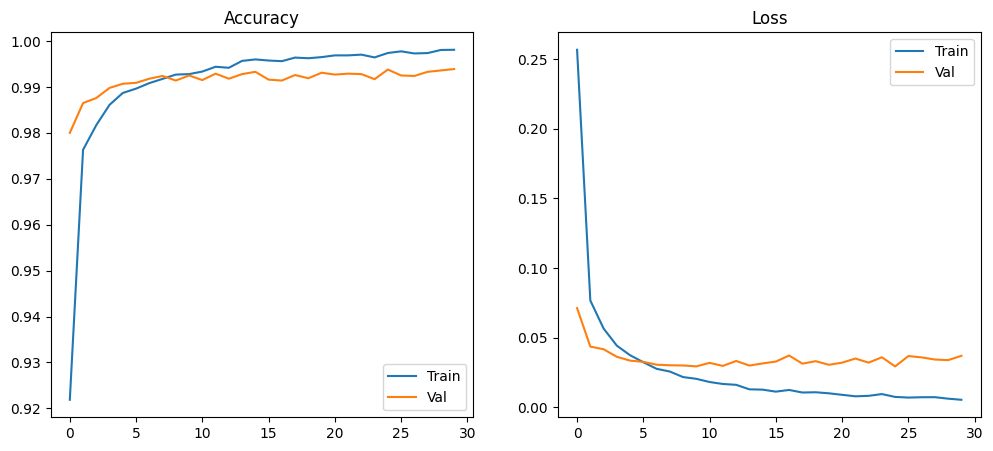

In [7]:
# Cell 5
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.show()


In [8]:
# Cell 6
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0347
Test Accuracy: 0.9941


In [20]:
model.save('mnist_cnn_model.keras')  # Modern format (more efficient)

THE MODEL IS NOW TRAINED, WE WILL NOW PERFORM THE IMAGE PREPROCESSING TASK THAT WILL ENABLE OUR MODEL READY FOR SOME REAL WORLD TESTING